In [54]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [55]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Case Study Household'

### Load the dataframe

In [56]:
# Load the data into data dataframe
#Your Code Here

data = pd.read_excel("DataCaseStudy.xlsx",sheet_name="Q2 data")
df = pd.DataFrame(data)
df.head(5)

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion,Property building category.1,Property building type.1
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981.44,905,888200,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1049.72,905,950000,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892.37,367,327500,2014,20142,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1061.52,356,377900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059.33,841,890900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT


# <font color=green>Data Cleaning<font>

Checking the existance of missing values, the type of variables, or integrity of data.

### How big the dataset??

In [57]:
#Your Code Here
num_rows = df.shape[0]
num_features = df.shape[1]
total_data = num_rows * num_features
print(f"Number of rows is {num_rows} and number of features is {num_features}. Therefore total datapoints is {total_data}")

Number of rows is 251 and number of features is 13. Therefore total datapoints is 3263


### What columns do we have?

In [58]:
df.columns

Index(['Id', 'Property building category', 'Property building type', 'Title',
       'Built up price psf', 'Size built up', 'Valuation price', 'YEAR',
       'QUARTER', 'NAME', 'Year completion', 'Property building category.1',
       'Property building type.1'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            251 non-null    int64  
 1   Property building category    251 non-null    object 
 2   Property building type        251 non-null    object 
 3   Title                         251 non-null    object 
 4   Built up price psf            251 non-null    float64
 5   Size built up                 251 non-null    int64  
 6   Valuation price               251 non-null    int64  
 7   YEAR                          251 non-null    int64  
 8   QUARTER                       251 non-null    int64  
 9   NAME                          251 non-null    object 
 10  Year completion               251 non-null    int64  
 11  Property building category.1  251 non-null    object 
 12  Property building type.1      251 non-null    object 
dtypes: fl

In [60]:
df.head(5)

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion,Property building category.1,Property building type.1
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981.44,905,888200,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1049.72,905,950000,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892.37,367,327500,2014,20142,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1061.52,356,377900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059.33,841,890900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT


In [61]:
df["Property building category"].unique()

array(['HIGHRISE'], dtype=object)

### Check for duplicated data

In [62]:
df.duplicated().any()

False

# <font color=green>Exploratory Data Analysis (EDA)<font>
Checking the relationship of variables, summary of data, outliers, filling missing values etc.

In [63]:
categorical = ["Property building category","Property building type", "Title", "NAME", "Property building category.1", "Property building type.1"]
df[categorical].head(5)

,Property building category,Property building type,Title,NAME,Property building category.1,Property building type.1
0,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,ASTRA SUITES,HIGHRISE,SERVICE APARTMENT
1,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,ASTRA SUITES,HIGHRISE,SERVICE APARTMENT
2,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,ASTRA SUITES,HIGHRISE,SERVICE APARTMENT
3,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,ASTRA SUITES,HIGHRISE,SERVICE APARTMENT
4,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,ASTRA SUITES,HIGHRISE,SERVICE APARTMENT


In [64]:
df.groupby(["NAME","QUARTER"])["Valuation price"].mean()


NAME               QUARTER
ASTRA SUITES       20044      236750.00
                   20051      191000.00
                   20054      136000.00
                   20062      176300.00
                   20063      257666.67
                                ...    
RAINBOW APARTMENT  20174     1719500.00
                   20181     1707000.00
                   20183     1823000.00
                   20184     1655500.00
                   20191     1004000.00
Name: Valuation price, Length: 86, dtype: float64

In [65]:
df_2016 = df[df["QUARTER"]>=20161]
df_2016_mean = df_2016.groupby(["NAME","QUARTER"])["Valuation price"].mean()
df_2016_mean

NAME               QUARTER
ASTRA SUITES       20161      810400.00
                   20162      370950.00
                   20163      370350.00
                   20164      751350.00
                   20171      375800.00
                   20173      707660.00
                   20174      376933.33
                   20181      515200.00
                   20182      680333.33
                   20183      739400.00
                   20184      534000.00
FLAT JALAN AMAN    20161      159000.00
                   20162      150000.00
                   20163      118000.00
                   20164      155000.00
                   20173      175000.00
                   20174      100000.00
                   20184      150000.00
                   20191      130000.00
                   20192      100000.00
HARBOURVIEW        20161     1762500.00
                   20162     1930000.00
                   20163      983333.33
                   20164      863333.33
             

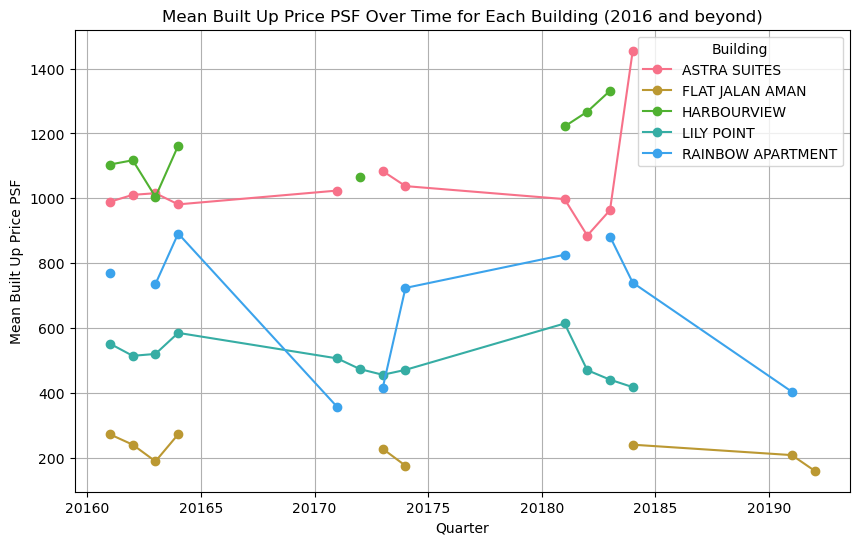

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df_2016 = df[df["QUARTER"] >= 20161]

# Group by "NAME" and "QUARTER" and calculate the mean valuation price
df_2016_mean = df_2016.groupby(["NAME", "QUARTER"])["Built up price psf"].mean().unstack(level=1)

# Plotting
sns.set_palette("husl")
df_2016_mean.T.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Mean Built Up Price PSF Over Time for Each Building (2016 and beyond)')
plt.xlabel('Quarter')
plt.ylabel('Mean Built Up Price PSF')
plt.legend(title='Building', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


# <font color=blue> Q2.1 <font>
- House prices are known to change over time due to various factors.
- **Valuation price** refers to the price at which the house is sold, while Built up price psf is the Valuation price divided by the area of the house in sq ft (in the Size built up column).
- **Quarter** refers to the date at which the property is sold (e.g. 20192 means Quarter 2 of 2019).
- The chart above shows the average price psf for these highrise buildings over time.
- Choose three buildings and compare amongst them based on the price trend chart and the raw data available in the "Q2 data" worksheet.


# <font color=blue> ANSWER Q2.1 <font>
- First, I will choose **ASTRA SUITES** because it shows fluctuating trend with some peaks and troughs. It also has significant increase in price during 20181 quarter, which may be worth investigating
- Second, I will choose **FLAT JALAN AMAN**. This building has a more consistent decrease in price over the quarters, which can provide a different perspective for comparison. It also has some quarters with missing data, which may be worth exploring.
- Third, I will choose **HOURBOURVIEW**. Harbourview shows a generally increasing trend, with some fluctuations. It has a relatively high starting point and continues to increase in valuation price over time.

# <font color=Green> Descriptive Statistic <font>

In [67]:
# Group data by building name
grouped_data = df.groupby('NAME')

# Calculate descriptive statistics for each building
statistics_df = grouped_data['Built up price psf','Size built up', 'Valuation price'].describe()

# Display the results
pd.DataFrame(statistics_df)
# Set display options to format floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)
statistics_df.transpose()

NAME                      ASTRA SUITES  FLAT JALAN AMAN  HARBOURVIEW  \
Built up price psf count         80.00            22.00        31.00   
                   mean         793.84           196.35      1131.11   
                   std          302.68            70.88       161.35   
                   min          324.25            59.94       746.27   
                   25%          429.84           160.45      1026.09   
                   50%          952.84           208.59      1112.22   
                   75%         1011.58           251.52      1214.84   
                   max         1455.04           329.03      1453.57   
Size built up      count         80.00            22.00        31.00   
                   mean         574.30           628.41      1114.29   
                   std          294.63            61.72       567.84   
                   min          216.00           568.00       730.00   
                   25%          367.00           581.75       743.00   
                   50%          367.00           623.00       764.00   
                   75%          824.50           623.00      1389.00   
                   max         1637.00           767.00      3455.00   
Valuation price    count         80.00            22.00        31.00   
                   mean      468610.00        122363.64   1255258.06   
                   std       307024.70         43587.40    678916.83   
                   min        89000.00         40000.00    680000.00   
                   25%       173000.00        100000.00    850000.00   
                   50%       375800.00        130000.00    980000.00   
                   75%       792750.00        150000.00   1412500.00   
                   max      1613000.00        200000.00   4100000.00   

NAME                      LILY POINT  RAINBOW APARTMENT  
Built up price psf count      100.00              18.00  
                   mean       494.28             691.84  
                   std         90.74             165.06  
                   min        211.51             356.73  
                   25%        446.30             651.04  
                   50%        491.84             746.03  
                   75%        539.66             811.83  
                   max        710.43             891.58  
Size built up      count      100.00              18.00  
                   mean      1117.84            2308.00  
                   std        144.18             293.21  
                   min       1033.00            2066.00  
                   25%       1098.00            2066.00  
                   50%       1098.00            2066.00  
                   75%       1098.00            2485.00  
                   max       2153.00            2755.00  
Valuation price    count      100.00              18.00  
                   mean    551220.52         1575611.11  
                   std     117372.22          336965.20  
                   min     232222.00          737000.00  
                   25%     491500.00         1441000.00  
                   50%     542500.00         1667500.00  
                   75%     600000.00         1791000.00  
                   max    1200000.00         2120000.00

## <font color=green>Valuation Price:<font>
#### ASTRA SUITES:

- The mean valuation price for **ASTRA SUITES** is approximately **468610.00**
- The standard deviation which is **307024.708** indicates a **moderate level** of variability in valuation prices.

#### FLAT JALAN AMAN:

- **FLAT JALAN AMAN** has a mean valuation price of approximately **122363.64**, significantly **lower than ASTRA SUITES and HARBOURVIEW**.
- The standard deviation is **relatively low** which is **43587.40**, indicating **less variability** in valuation prices compared to **ASTRA SUITES**.

#### HARBOURVIEW:

- **HARBOURVIEW** exhibits a **highest mean valuation price** compare to ASTRA SUITES and FLAT JALAN AMAN, approximately **1255258.06**
- The standard deviation which is **678916.83** suggests a **moderate level** of variability in valuation prices.

## <font color=green>Built up price PSF:<font>
#### ASTRA SUITES:

- The mean built up price PSF is **793.84 higher than FLAT JALAN AMAN**

#### FLAT JALAN AMAN:

- Have the **lowest mean** which is **196.35** compare to **ASTRA SUITES** and **HARBOURVIEW**
- Maybe it will attract more potential buyer or investor because it more affordable to them

#### HARBOURVIEW:

- Have the **highest mean** which is **1131.11** compare to **ASTRA SUITES** and **FLAT JALAN AMAN**
- Affordability for potential buyers or tenants may be a concern

# <font color=blue> Q2.2 <font>
- Plot another price trend that shows the median price psf across time for these three buildings.
- You may use any software/method of your choice.
- What is the difference between the median and average value of a set of data?

In [74]:
# Make sure that we have only three building that we want to analyze
df_three = df.drop(df[(df['NAME'] == "LILY POINT") | (df['NAME'] == "RAINBOW APARTMENT")].index, inplace=False)
df_three

,Id,Property building category,Property building type,Title,Built up price psf,Size built up,Valuation price,YEAR,QUARTER,NAME,Year completion,Property building category.1,Property building type.1
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981.44,905,888200,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1049.72,905,950000,2015,20152,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892.37,367,327500,2014,20142,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1061.52,356,377900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059.33,841,890900,2014,20144,ASTRA SUITES,2004,HIGHRISE,SERVICE APARTMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,756278,HIGHRISE,CONDO,RESIDENTIAL,1305.97,1313,1715000,2018,20182,HARBOURVIEW,1994,HIGHRISE,CONDO
129,757293,HIGHRISE,CONDO,RESIDENTIAL,1279.10,743,950000,2018,20183,HARBOURVIEW,1994,HIGHRISE,CONDO
130,757294,HIGHRISE,CONDO,RESIDENTIAL,1180.33,1313,1550000,2018,20183,HARBOURVIEW,1994,HIGHRISE,CONDO
131,758386,HIGHRISE,CONDO,RESIDENTIAL,1453.57,743,1080000,2018,20183,HARBOURVIEW,1994,HIGHRISE,CONDO


# <font color=blue> ANSWER Q2.2 <font>
- Median: The median is the middle value of a dataset when it is arranged in ascending or descending order. If there is an even number of data points, the median is the average of the two middle values.
- Average (Mean): The average, or mean, is the sum of all values in a dataset divided by the number of values.
- Based on the median plotted chart, we can see that the trends or patterns are almost same with mean plotted chart but have slightly different value for some of them

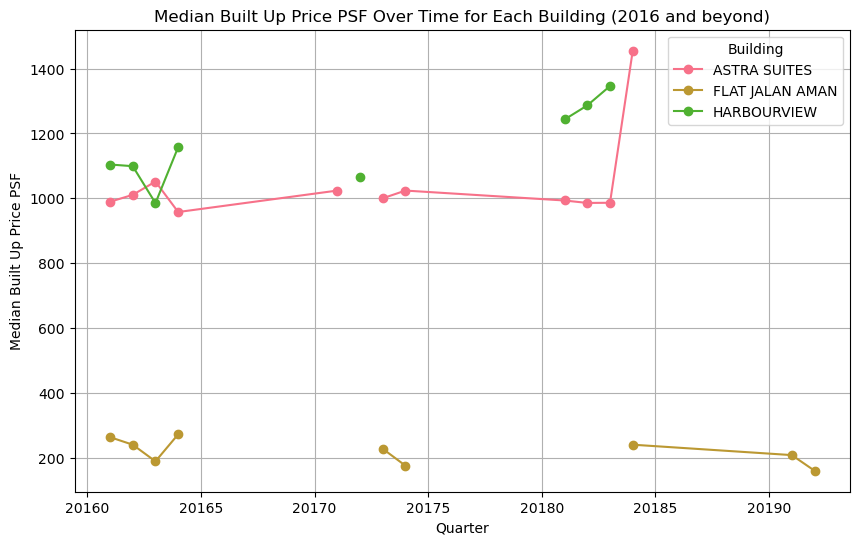

In [70]:
# Assuming df is your DataFrame
df_2016 = df_three[df_three["QUARTER"] >= 20161]

# Group by "NAME" and "QUARTER" and calculate the mean valuation price
df_2016_median = df_2016.groupby(["NAME", "QUARTER"])["Built up price psf"].median().unstack(level=1)

# Plotting
sns.set_palette("husl")
df_2016_median.T.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Median Built Up Price PSF Over Time for Each Building (2016 and beyond)')
plt.xlabel('Quarter')
plt.ylabel('Median Built Up Price PSF')
plt.legend(title='Building', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# <font color=blue> Q2.3 <font>
- Plot another price trend that shows the median valuation price across time for these three buildings.
- You may use any software/method of your choice.
- Discuss and compare the three buildings using this chart.

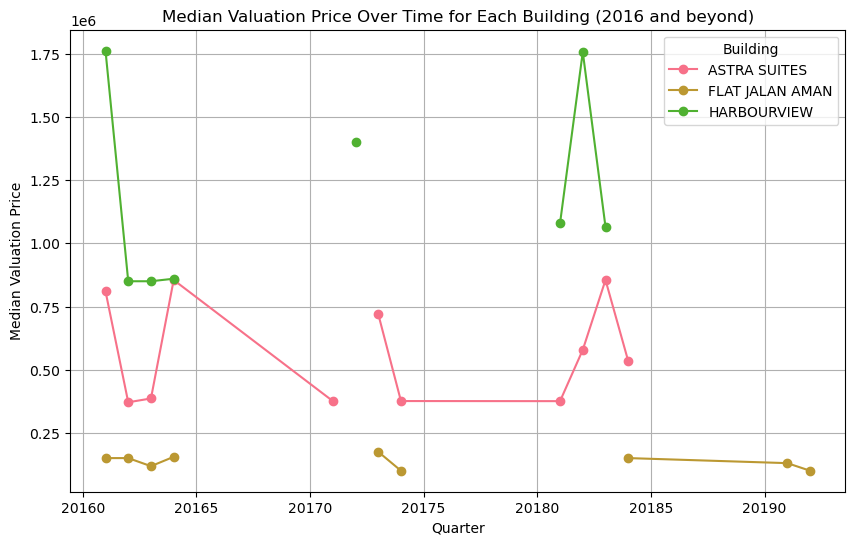

In [75]:
# Assuming df is your DataFrame
df_2016 = df_three[df_three["QUARTER"] >= 20161]

# Group by "NAME" and "QUARTER" and calculate the mean valuation price
df_2016_median_valuation = df_2016.groupby(["NAME", "QUARTER"])["Valuation price"].median().unstack(level=1)

# Plotting
sns.set_palette("husl")
df_2016_median_valuation.T.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Median Valuation Price Over Time for Each Building (2016 and beyond)')
plt.xlabel('Quarter')
plt.ylabel('Median Valuation Price')
plt.legend(title='Building', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [79]:
df_2016 = df_three[df_three["QUARTER"]>=20161]
df_2016_median = df_2016.groupby(["NAME","QUARTER"])["Valuation price"].median()
df_2016_median

NAME             QUARTER
ASTRA SUITES     20161      810400.00
                 20162      370950.00
                 20163      386000.00
                 20164      855000.00
                 20171      375800.00
                 20173      720300.00
                 20174      375800.00
                 20181      375400.00
                 20182      578500.00
                 20183      855000.00
                 20184      534000.00
FLAT JALAN AMAN  20161      150000.00
                 20162      150000.00
                 20163      118000.00
                 20164      155000.00
                 20173      175000.00
                 20174      100000.00
                 20184      150000.00
                 20191      130000.00
                 20192      100000.00
HARBOURVIEW      20161     1762500.00
                 20162      850000.00
                 20163      850000.00
                 20164      860000.00
                 20172     1400000.00
                 20181   

# <font color=blue> ANSWER Q2.3 <font>

#### ASTRA SUITES:

- There's a significant increase in median valuation price from 20162 to 20164
- The increasing pattern might indicate strong demand or favorable market conditions for that period of time.
- Then have drastic decrease from 20173 to 20181 and it might because of potential factors affecting property value.

#### FLAT JALAN AMAN:

- The median valuation prices appear relatively stable with some fluctuations
- The constant median valuation price shows that the market is stable on that time for FLAT JALAN AMAN

#### HARBOURVIEW:

- The starting point for this median valuation price is a little bit higher rather than ASTRA SUITES and FLAT JALAN AMAN
- The trend shows that 2 significant decrease from 20161 to 20163 and from 20182 to 20183. 
- But it also have significant increase from 20181 to 20182 
- Therefore, further investigation needed to find the reason for this significant fluctuation in the median valuation price. 
    
# <font color=blue> SUMMARY <font>
- To know all the reason why this fluctuation happened for these three buildings. We need to see the economy growth on each spot for this building.
- Then we also need to investigate the interest rate for all these building because it will affect the affordability for buyer or investor
- Areas with growing populations may experience increased demand for housing
- Location Quality such as having schools, transportation, and employment centers can significantly affect property values.